In [1]:
import numpy, scipy, matplotlib.pyplot as plt, sklearn, librosa, urllib, IPython.display
import essentia, essentia.standard as ess
plt.rcParams['figure.figsize'] = (14,4)

[&larr; Back to Index](index.html)

# Mel Frequency Cepstral Coefficients (MFCCs)

The [mel frequency cepstral coefficients](https://en.wikipedia.org/wiki/Mel-frequency_cepstrum) (MFCCs) of a signal are a small set of features (usually about 10-20) which concisely describe the overall shape of a spectral envelope. In MIR, it is often used to describe timbre.

Download an audio file:

In [5]:
# url = 'http://audio.musicinformationretrieval.com/simple_loop.wav'
# urllib.requests.retrieve(url, filename='simple_loop.wav')
!ls audio/simple_loop.wav

audio/simple_loop.wav


Plot the audio signal:

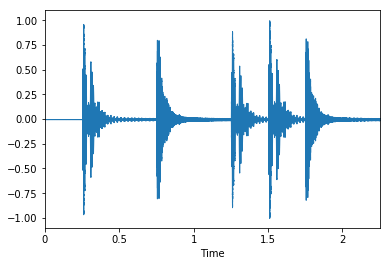

In [7]:
import librosa.display
x, fs = librosa.load('audio/simple_loop.wav')
librosa.display.waveplot(x, sr=fs)

Play the audio:

In [8]:
IPython.display.Audio(x, rate=fs)

## `librosa.feature.mfcc`

[`librosa.feature.mfcc`](http://bmcfee.github.io/librosa/generated/librosa.feature.mfcc.html#librosa.feature.mfcc) computes MFCCs across an audio signal:


In [10]:
mfccs = librosa.feature.mfcc(x, sr=fs)
print(mfccs.shape)

(20, 97)


In this case, `mfcc` computed 20 MFCCs over 130 frames.

The very first MFCC, the 0th coefficient, does not convey information relevant to the overall shape of the spectrum. It only conveys a constant offset, i.e. adding a constant value to the entire spectrum. Therefore, many practitioners will discard the first MFCC when performing classification. For now, we will use the MFCCs as is.

Display the MFCCs:

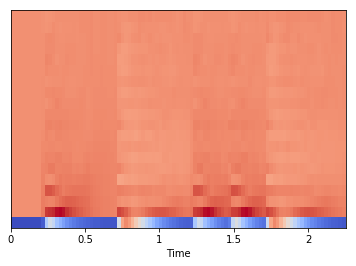

In [11]:
librosa.display.specshow(mfccs, sr=fs, x_axis='time')

### Feature Scaling

Let's scale the MFCCs such that each coefficient dimension has zero mean and unit variance:

In [13]:
mfccs = sklearn.preprocessing.scale(mfccs, axis=1)
print(mfccs.mean(axis=1))
print(mfccs.var(axis=1))

[-3.6868852e-09  1.4133060e-08 -3.6868852e-09 -1.4747541e-08
  1.2135997e-08  2.7651639e-08  5.2230873e-09 -9.8316937e-09
 -2.2274932e-08  2.1506830e-08 -1.2174402e-08 -7.5273903e-09
  1.2289617e-09 -8.6027319e-09 -1.4747541e-08 -1.2289617e-09
 -3.6868852e-09 -7.3737705e-09  9.0635925e-09  1.3979440e-08]
[1.0000002  0.9999997  0.9999998  0.99999994 0.99999976 0.9999998
 1.0000001  0.99999994 0.9999995  1.         0.99999994 1.0000001
 0.9999995  0.99999994 1.0000001  1.0000002  0.99999994 1.0000002
 1.         1.0000001 ]


/home/cjbayron/virtualenvs/pytorch/lib/python3.6/site-packages/sklearn/preprocessing/data.py:180: UserWarning: Numerical issues were encountered when centering the data and might not be solved. Dataset may contain too large values. You may need to prescale your features.
  warnings.warn("Numerical issues were encountered "
/home/cjbayron/virtualenvs/pytorch/lib/python3.6/site-packages/sklearn/preprocessing/data.py:197: UserWarning: Numerical issues were encountered when scaling the data and might not be solved. The standard deviation of the data is probably very close to 0. 
  warnings.warn("Numerical issues were encountered "


Display the scaled MFCCs:

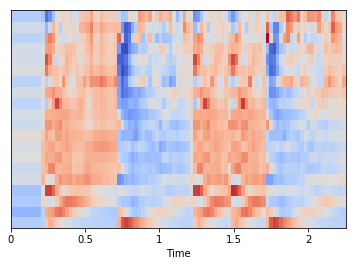

In [14]:
librosa.display.specshow(mfccs, sr=fs, x_axis='time')

## `essentia.standard.MFCC`

We can also use [`essentia.standard.MFCC`](http://essentia.upf.edu/documentation/reference/std_MFCC.html) to compute MFCCs across a signal, and we will display them as a "MFCC-gram":

In [16]:
hamming_window = ess.Windowing(type='hamming')
spectrum = ess.Spectrum()  # we just want the magnitude spectrum
mfcc = ess.MFCC(numberCoefficients=13)
frame_sz = 1024
hop_sz = 500

mfccs = numpy.array([mfcc(spectrum(hamming_window(frame)))[1]
               for frame in ess.FrameGenerator(x, frameSize=frame_sz, hopSize=hop_sz)])
print(mfccs.shape)

(101, 13)


Scale the MFCCs:

In [17]:
mfccs = sklearn.preprocessing.scale(mfccs)

/home/cjbayron/virtualenvs/pytorch/lib/python3.6/site-packages/sklearn/preprocessing/data.py:180: UserWarning: Numerical issues were encountered when centering the data and might not be solved. Dataset may contain too large values. You may need to prescale your features.
  warnings.warn("Numerical issues were encountered "
/home/cjbayron/virtualenvs/pytorch/lib/python3.6/site-packages/sklearn/preprocessing/data.py:197: UserWarning: Numerical issues were encountered when scaling the data and might not be solved. The standard deviation of the data is probably very close to 0. 
  warnings.warn("Numerical issues were encountered "


Plot the MFCCs:

Text(0.5,0,'Frame Index')

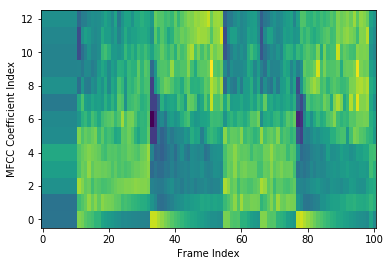

In [18]:
plt.imshow(mfccs.T, origin='lower', aspect='auto', interpolation='nearest')
plt.ylabel('MFCC Coefficient Index')
plt.xlabel('Frame Index')

[&larr; Back to Index](index.html)